# Exploratory Data Analysis of 2019 Medium articles dataset

Import and load libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Datasets

In [2]:
data = pd.read_csv('medium_data.csv')
data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


## -  Assessing the data

In [3]:
data.describe()

,id,claps,reading_time
count,6508.000000,6508.000000,6508.000000
mean,3254.500000,311.076060,6.134911
std,1878.842108,950.789896,3.231918
min,1.000000,0.000000,0.000000
25%,1627.750000,54.000000,4.000000
50%,3254.500000,115.000000,5.000000
75%,4881.250000,268.250000,7.000000
max,6508.000000,38000.000000,55.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


### Duplicate dataframe to protect the integrity of the original data

In [5]:
df = data.copy()

In [6]:
# checking the number of unique enteries in each of the column 
df.nunique()

id              6508
url             6508
title           6504
subtitle        3470
image           6361
claps            854
responses         56
reading_time      34
publication        7
date              50
dtype: int64

In [7]:
# checking for duplicates entries
df.duplicated().any()

False

### Percentage of missing data in each field

In [8]:
# missing values in the dataset
null_count = df.isnull().sum()
total_count = df.shape[0]

# calculating the percentage of missing value per column rounded up to 2 decimal place
null_percentage = round((null_count/total_count) * 100, 2)
null_percentage

id               0.00
url              0.00
title            0.00
subtitle        46.54
image            2.26
claps            0.00
responses        0.00
reading_time     0.00
publication      0.00
date             0.00
dtype: float64

In [9]:
null_df = pd.DataFrame({'null_count':null_count, 'null_percentage': null_percentage})
null_df

,null_count,null_percentage
id,0,0.00
url,0,0.00
title,0,0.00
subtitle,3029,46.54
image,147,2.26
claps,0,0.00
responses,0,0.00
reading_time,0,0.00
publication,0,0.00
date,0,0.00


> The dataset contains 6508 article enteries and 10 columns. Only the subtitle and image columns have null values. The subtitle column has 46.54% missing data while image column has 2.26% missing values

## - Cleaning the data

### Cleaning responses column

In [10]:
# taking a closer look into the responses column
df['responses'].unique()

array(['8', '11', '1', '0', '3', '2', '60', '27', '58', '13', '6', '15',
       '5', '4', '19', '10', '9', '7', '16', '76', '33', '21', '28', '14',
       '24', '17', '78', '30', '12', '74', '50', '18', '22', '48', '26',
       '20', '35', '51', '25', '62', '53', '120', '41', 'Read', '34',
       '86', '82', '63', '46', '170', '45', '23', '32', '29', '52', '117'],
      dtype=object)

In [11]:
# rows with 'Read' in responses column 
df[df['responses'] == 'Read']

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
3977,3978,https://medium.com/datadriveninvestor/what-do-...,What do you think of the Open Group’s Data Sci...,NaN,3978.jpg,73,Read,3,Data Driven Investor,2019-05-24
6392,6393,https://uxdesign.cc/please-please-please-tell-...,"UX doesn’t discriminate, it targets behaviours",NaN,NaN,74,Read,5,UX Collective,2019-12-05


In [12]:
# remove the rows with 'Read' in responses column
read_loc = [3977, 6392]
df.drop(read_loc, inplace=True)
df['responses'].unique()

array(['8', '11', '1', '0', '3', '2', '60', '27', '58', '13', '6', '15',
       '5', '4', '19', '10', '9', '7', '16', '76', '33', '21', '28', '14',
       '24', '17', '78', '30', '12', '74', '50', '18', '22', '48', '26',
       '20', '35', '51', '25', '62', '53', '120', '41', '34', '86', '82',
       '63', '46', '170', '45', '23', '32', '29', '52', '117'],
      dtype=object)

In [13]:
# convert responses column to int datatype
df['responses'] = df['responses'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6506 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6506 non-null   int64 
 1   url           6506 non-null   object
 2   title         6506 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6360 non-null   object
 5   claps         6506 non-null   int64 
 6   responses     6506 non-null   int32 
 7   reading_time  6506 non-null   int64 
 8   publication   6506 non-null   object
 9   date          6506 non-null   object
dtypes: int32(1), int64(3), object(6)
memory usage: 533.7+ KB


### Cleaning Image column

In [14]:
# inspecting the image column
df['image'].unique()

array(['1.png', '2.png', '3.png', ..., '6506.jpg', '6507.jpg', '6508.jpg'],
      dtype=object)

In [15]:
# making a copy of the dataset 
df_image = df.copy()

In [16]:
# create a dataframe for only values of image column that is not null
df_image = df_image[df_image['image'].notnull()]

# the image column contains the image number and image type, to get the image type, split the cell on '.'
# select the value after after the '.'

df_image['image_type'] = df_image['image'].str.split('.').str[-1]
df_image.head(5)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date,image_type
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30,png
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30,png
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30,png
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30,jpeg
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30,jpeg


In [17]:
df_image['image_type'].value_counts()

jpeg    3069
jpg     1768
png     1434
gif       81
jpe        3
PNG        2
           2
JPG        1
Name: image_type, dtype: int64

In [18]:
# two rows contain empty values, removing them

drop_image = df_image[df_image['image_type'] == ''].index
df_image.drop(drop_image, inplace =True)
df_image['image_type'].value_counts()

jpeg    3069
jpg     1768
png     1434
gif       81
jpe        3
PNG        2
JPG        1
Name: image_type, dtype: int64

In [19]:
# jpeg and jpg mean thesame thing, so merge and change values to lowercase
df_image['image_type'] = df_image['image_type'].str.replace('jpeg', 'jpg', regex=True).str.replace('jpe', 'jpg', regex=True).str.lower()
df_image['image_type'].value_counts()

jpg    4841
png    1436
gif      81
Name: image_type, dtype: int64

## -Exploratory Visualiation

### Image type frequency

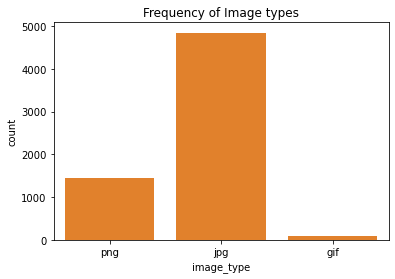

In [20]:
bar_theme = sns.color_palette()[1]
sns.countplot(data=df_image, x='image_type', color=bar_theme);
plt.title('Frequency of Image types')

plt.show()

### Frequency Distribution of the Publications

In [21]:
df['publication'].value_counts()

The Startup                3041
Towards Data Science       1461
Data Driven Investor        777
UX Collective               554
The Writing Cooperative     403
Better Marketing            242
Better Humans                28
Name: publication, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Publication')

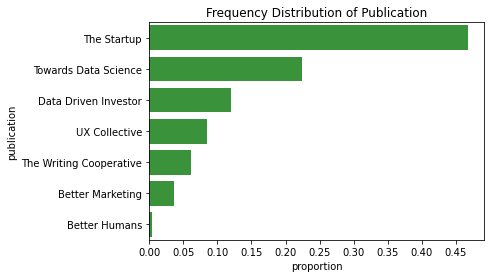

In [22]:
# get order of bars by frequency
pub_counts = df['publication'].value_counts()
pub_order = pub_counts.index
    
# Compute largest proportion
# Returns the sum of all not-null values in `type` column
n_pub = df['publication'].value_counts().sum()
max_pub_count = pub_counts[0]
max_prop = max_pub_count / n_pub
   
# establish tick locations and create plot
theme_color = sns.color_palette()[2]
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sns.countplot(data = df, y = 'publication', color = theme_color, order = pub_order);
plt.xticks(tick_props * n_pub, tick_names)
plt.xlabel('proportion');
plt.title('Frequency Distribution of Publication')

> About 45% of the publications on Medium in 2019 were 'The Startup'

### Number of Responses Per Publication

In [23]:
#group dataset by publication and sum of responses
pub_resp_sum = df.groupby('publication', sort=True, as_index=False)[['publication', 'responses']].sum()

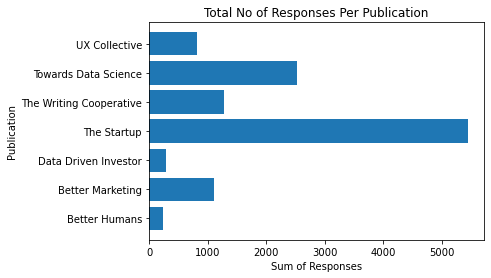

In [24]:
plt.barh(data=pub_resp_sum, y='publication', width='responses')

#axis labeling
plt.title('Total No of Responses Per Publication')
plt.xlabel('Sum of Responses')
plt.ylabel('Publication')

plt.show()

In [25]:
# group dataset by publication and average number of responses
pub_resp_mean = df.groupby('publication', sort=True, as_index=False)[['publication', 'responses']].mean()

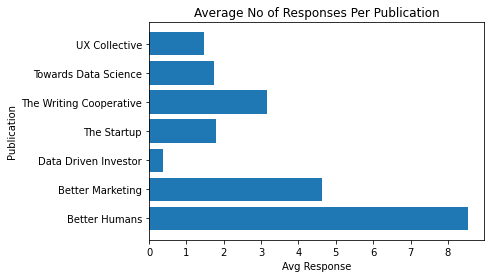

In [26]:
plt.barh(data=pub_resp_mean, y='publication', width='responses')

# axis labeling
plt.title('Average No of Responses Per Publication')
plt.xlabel('Avg Response')
plt.ylabel('Publication')

plt.show()

> Although The startup publication has the highest number of publication and highest number of responses put together, they do not have the highest average response per article. Instead Better Humans and Better Marketing articles have the highest number of responses per article published.

### Total Number of Claps Per Publication

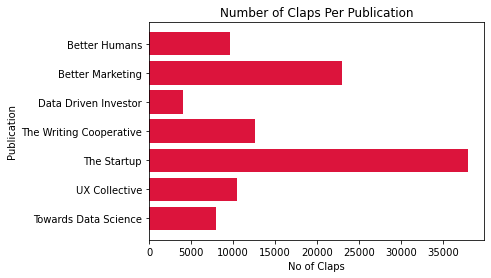

In [27]:
plt.barh(data=df, y='publication', width='claps', color= 'crimson');
plt.title('Number of Claps Per Publication')
plt.xlabel('No of Claps')
plt.ylabel('Publication');

### Visualizing Reading Time for Each Publication

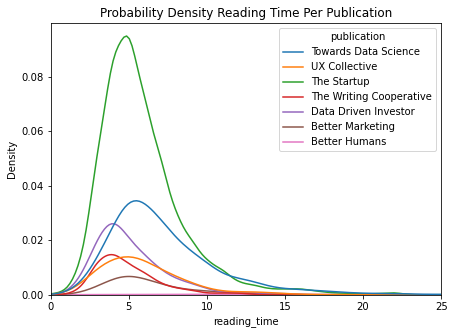

In [28]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="reading_time", hue="publication")

plt.title('Probability Density Reading Time Per Publication')

plt.xlim(0,25)
plt.show()

### Relationship Between Responses and Claps

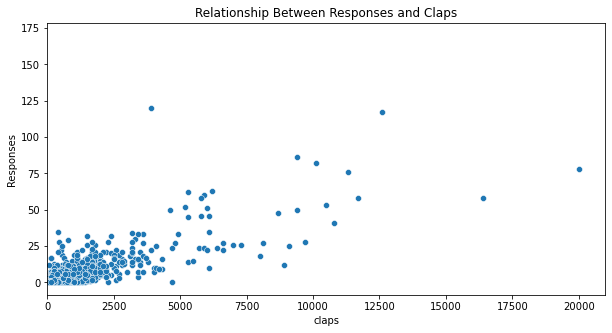

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= df, x='claps', y='responses')

plt.title('Relationship Between Responses and Claps')
plt.ylabel('Responses')
plt.xlim(0, 21000)

plt.show()

> There seems to be a linear correlation between number of responses and claps